In [1]:
from struct import unpack
from pathlib import Path
from enum import Enum

import xmltodict
import numpy as np

import matplotlib.pyplot as plt

from astropy.time import Time
import astropy.units as u

from fass.ser import load_ser_file
from fass.sequence import Sequence

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [60]:
plt.close('all')

In [108]:
testfile = "/mnt/c/Users/tepic/Desktop/SharpCap Captures/2022-07-27/test/21_54_45.ser"
testfile = "/home/tim/MMT/FASS/data/indi_2022-08-29/indi_record_2022-08-29@04-56-16.ser"
p = Path(testfile)

In [110]:
d = load_ser_file(testfile)

ValueError: cannot reshape array of size 1551552768 into shape (437,1104,1608)

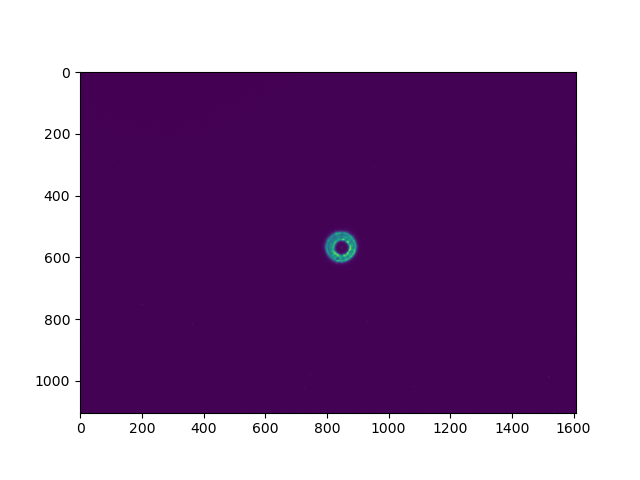

In [111]:
plt.imshow(d['data'][0:50, :, :].sum(axis=0))
#plt.imshow(d['data'][2, :, :]) # - d['data'][0, :, :])
plt.show()

In [24]:
d.keys()

dict_keys(['filename', 'file_id', 'lu_id', 'color_id', 'nplanes', 'littleendian', 'im_width', 'im_height', 'pix_depth_per_plane', 'bytes_per_pixel', 'nframe', 'observer', 'instrument', 'telescope', 'dateobs', 'dateobs_utc', 'data', 'frame_times'])

In [106]:
d['data'].shape

(873, 1104, 1608)

In [107]:
(d['frame_times'][2] - d['frame_times'][1]).to_value('sec')

0.011543273923919628

In [6]:
import xmltodict
import json

In [7]:
with open("/home/tim/multi_test.esl", 'rb') as fp:
    d = xmltodict.parse(fp)
d

{'SchedulerList': {'@version': '1.5',
  'Profile': 'Default',
  'Job': [{'Name': 'Aldebaran',
    'Priority': '10',
    'Coordinates': {'J2000RA': '4.59867', 'J2000DE': '16.5098'},
    'PositionAngle': '-181',
    'Sequence': '/home/tim/test.esq',
    'StartupCondition': {'Condition': 'ASAP'},
    'Constraints': {'Constraint': [{'@value': '45',
       '#text': 'MinimumAltitude'},
      'EnforceTwilight',
      'EnforceArtificialHorizon']},
    'CompletionCondition': {'Condition': {'@value': '100', '#text': 'Repeat'}},
    'Steps': {'Step': 'Track'}},
   {'Name': 'Vega',
    'Priority': '10',
    'Coordinates': {'J2000RA': '18.6156', 'J2000DE': '38.783'},
    'PositionAngle': '-181',
    'Sequence': '/home/tim/test.esq',
    'StartupCondition': {'Condition': 'ASAP'},
    'Constraints': {'Constraint': [{'@value': '45',
       '#text': 'MinimumAltitude'},
      'EnforceTwilight',
      'EnforceArtificialHorizon']},
    'CompletionCondition': {'Condition': {'@value': '100', '#text': 'Repea

In [8]:
with open("sequence_list_template.json", 'w') as fp:
    json.dump(d, fp, indent=4)

In [11]:
s = Sequence()

In [12]:
s.config

{'SequenceQueue': {'@version': '2.3',
  'CCD': '',
  'FilterWheel': '',
  'GuideDeviation': {'@enabled': 'false', '#text': '2'},
  'GuideStartDeviation': {'@enabled': 'false', '#text': '2'},
  'Autofocus': {'@enabled': 'false', '#text': '0'},
  'RefocusOnTemperatureDelta': {'@enabled': 'false', '#text': '1'},
  'RefocusEveryN': {'@enabled': 'false', '#text': '60'},
  'RefocusOnMeridianFlip': {'@enabled': 'false'},
  'Job': {'Exposure': '1',
   'Format': 'Mono',
   'Encoding': 'FITS',
   'Binning': {'X': '1', 'Y': '1'},
   'Frame': {'X': '0', 'Y': '0', 'W': '1280', 'H': '1024'},
   'Temperature': {'@force': 'false', '#text': '0'},
   'Filter': '',
   'Type': 'Light',
   'Prefix': {'RawPrefix': None,
    'FilterEnabled': '0',
    'ExpEnabled': '0',
    'TimeStampEnabled': '0'},
   'Count': '2',
   'Delay': '30',
   'PostCaptureScript': '/home/tim/conda/envs/fass/bin/vid_capture',
   'FITSDirectory': '',
   'UploadMode': '0',
   'Properties': None,
   'Calibration': {'FlatSource': {'Type'